### Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
import yfinance
start_date = "2017-01-01"
end_date = "2022-06-01"
symbol = "IOC.NS"

df = yfinance.download(tickers = symbol,start="2010-03-06",
                               interval = "1d", group_by = 'ticker', auto_adjust = True)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2010-03-08,26.707161,26.767478,26.375422,26.508980,3420936
2010-03-09,26.590840,26.668389,26.207400,26.315109,2820648
2010-03-10,26.160009,26.444358,26.069535,26.349575,2508072
2010-03-11,26.452974,26.625308,25.983369,26.220327,3387942
2010-03-12,26.280637,26.323719,26.030755,26.172930,1900506
...,...,...,...,...,...
2023-07-31,96.000000,96.199997,93.000000,93.750000,25418124
2023-08-01,93.800003,94.750000,93.300003,94.000000,16132927
2023-08-02,94.400002,94.650002,93.000000,93.849998,16780965


In [2]:
import pandas as pd

In [3]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-03-08,26.707161,26.767478,26.375422,26.508980,3420936
2010-03-09,26.590840,26.668389,26.207400,26.315109,2820648
2010-03-10,26.160009,26.444358,26.069535,26.349575,2508072
2010-03-11,26.452974,26.625308,25.983369,26.220327,3387942
2010-03-12,26.280637,26.323719,26.030755,26.172930,1900506


In [4]:
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2023-07-31,96.000000,96.199997,93.000000,93.750000,25418124
2023-08-01,93.800003,94.750000,93.300003,94.000000,16132927
2023-08-02,94.400002,94.650002,93.000000,93.849998,16780965
2023-08-03,93.900002,94.199997,93.150002,93.500000,8703991
2023-08-04,93.550003,93.900002,92.050003,92.300003,10743670


In [5]:
df1=df.reset_index()['Close']

In [6]:
df1

0       26.508980
1       26.315109
2       26.349575
3       26.220327
4       26.172930
          ...    
3309    93.750000
3310    94.000000
3311    93.849998
3312    93.500000
3313    92.300003
Name: Close, Length: 3314, dtype: float64

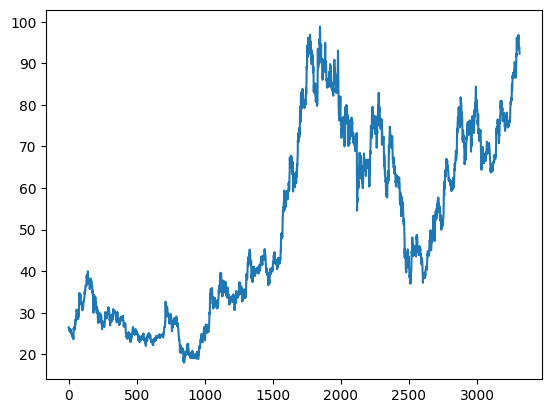

In [7]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [291]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [8]:
import numpy as np

In [9]:
df1

0       26.508980
1       26.315109
2       26.349575
3       26.220327
4       26.172930
          ...    
3309    93.750000
3310    94.000000
3311    93.849998
3312    93.500000
3313    92.300003
Name: Close, Length: 3314, dtype: float64

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [11]:
print(df1)

[[0.10480765]
 [0.10240895]
 [0.10283538]
 ...
 [0.93799529]
 [0.93366487]
 [0.91881772]]


In [12]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [13]:
training_size,test_size

(2154, 1160)

In [14]:
train_data

array([[0.10480765],
       [0.10240895],
       [0.10283538],
       ...,
       [0.56717117],
       [0.55973919],
       [0.56831444]])

In [15]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [16]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [18]:
print(X_train.shape), print(ytest.shape)

(2053, 100)
(1059,)


(None, None)

In [22]:
print(X_test.shape), print(ytest.shape)

(1059, 100)
(1059,)


(None, None)

In [19]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [20]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

2023-08-07 09:23:01.150425: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [21]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
33/33 [==============================] - 17s 293ms/step - loss: 0.0200 - val_loss: 0.0013
Epoch 2/100
33/33 [==============================] - 7s 214ms/step - loss: 0.0011 - val_loss: 9.9465e-04
Epoch 3/100
33/33 [==============================] - 7s 215ms/step - loss: 9.7104e-04 - val_loss: 9.4789e-04
Epoch 4/100
33/33 [==============================] - 8s 232ms/step - loss: 9.8076e-04 - val_loss: 9.5736e-04
Epoch 5/100
33/33 [==============================] - 8s 234ms/step - loss: 9.2661e-04 - val_loss: 8.5159e-04
Epoch 6/100
33/33 [==============================] - 7s 223ms/step - loss: 8.8063e-04 - val_loss: 8.2566e-04
Epoch 7/100
33/33 [==============================] - 7s 220ms/step - loss: 8.7970e-04 - val_loss: 9.0360e-04
Epoch 8/100
33/33 [==============================] - 8s 237ms/step - loss: 8.3390e-04 - val_loss: 7.3310e-04
Epoch 9/100
33/33 [==============================] - 7s 208ms/step - loss: 7.9719e-04 - val_loss: 0.0010
Epoch 10/100
33/33 [==============

33/33 [==============================] - 9s 270ms/step - loss: 2.3842e-04 - val_loss: 1.8928e-04
Epoch 76/100
33/33 [==============================] - 21s 640ms/step - loss: 1.7920e-04 - val_loss: 2.1174e-04
Epoch 77/100
33/33 [==============================] - 19s 568ms/step - loss: 1.9040e-04 - val_loss: 1.7151e-04
Epoch 78/100
33/33 [==============================] - 21s 642ms/step - loss: 1.7132e-04 - val_loss: 4.8220e-04
Epoch 79/100
33/33 [==============================] - 19s 565ms/step - loss: 2.8732e-04 - val_loss: 2.4163e-04
Epoch 80/100
33/33 [==============================] - 12s 365ms/step - loss: 1.9165e-04 - val_loss: 2.0836e-04
Epoch 81/100
33/33 [==============================] - 8s 237ms/step - loss: 1.8790e-04 - val_loss: 1.6043e-04
Epoch 82/100
33/33 [==============================] - 8s 243ms/step - loss: 1.6935e-04 - val_loss: 1.8344e-04
Epoch 83/100
33/33 [==============================] - 9s 270ms/step - loss: 1.6984e-04 - val_loss: 1.5833e-04
Epoch 84/100
33/33

In [23]:
import tensorflow as tf

In [24]:
tf.__version__

'2.13.0'

In [25]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

34/34 [==============================] - 1s 37ms/step


In [26]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [27]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

49.571223879793294

In [28]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

66.24778318871667

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


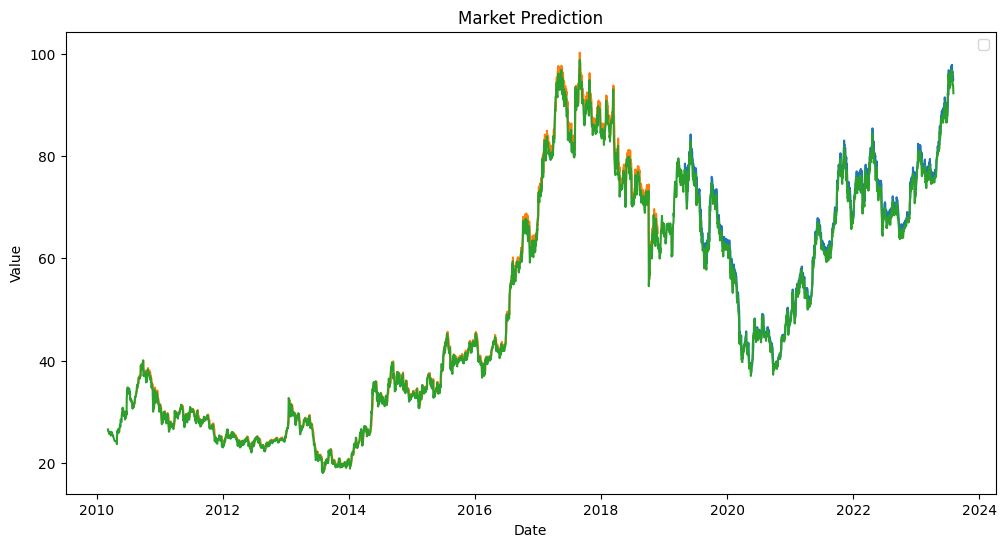

In [92]:
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

test_df = pd.DataFrame({"close" :testPredictPlot[:,0] ,"date" : indexs })
test_df['date'] = pd.to_datetime(test_df['date'])

# Set the 'Date' column as the index
test_df.set_index('date', inplace=True)
#test_df.plot(figsize=(12, 6))


plt.figure(figsize=(12, 6))  # Width: 8 inches, Height: 6 inches
plt.plot(test_df)
plt.plot(trained_df)
plt.plot(new_df)


plt.title('Market Prediction')

plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()  # Show legend with labels
plt.show()

In [38]:
len(test_data)

1160

In [39]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 819)

In [40]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [41]:
temp_input

[0.3082821188259639,
 0.29804931771571685,
 0.29804931771571685,
 0.2862178272739647,
 0.29165394681620493,
 0.3153171164915528,
 0.28685735964411985,
 0.28014222255953036,
 0.2663919934134302,
 0.2612756872542284,
 0.25232195088429155,
 0.2587175105756471,
 0.2558395205140273,
 0.2628744709816553,
 0.2574383042414542,
 0.25967671473495796,
 0.23441480853014413,
 0.23761251757888052,
 0.2507231199589038,
 0.25296153045240755,
 0.25967671473495796,
 0.27022928203028257,
 0.272787411510903,
 0.27374671006613566,
 0.3089216983940799,
 0.3277882808973427,
 0.3255498232058781,
 0.33322435324162203,
 0.3261894027739941,
 0.34857341331311,
 0.372236535790497,
 0.35656775673189234,
 0.35209088854692394,
 0.3418582290305595,
 0.3415384156475211,
 0.32810804708242025,
 0.3194741240955219,
 0.31627646224474637,
 0.3194741240955219,
 0.3223520669591807,
 0.33993958472213337,
 0.3482536471280324,
 0.33386388561177716,
 0.320753236033793,
 0.34697462958568304,
 0.33386388561177716,
 0.32267188034221

In [42]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.29804932 0.29804932 0.28621783 0.29165395 0.31531712 0.28685736
 0.28014222 0.26639199 0.26127569 0.25232195 0.25871751 0.25583952
 0.26287447 0.2574383  0.25967671 0.23441481 0.23761252 0.25072312
 0.25296153 0.25967671 0.27022928 0.27278741 0.27374671 0.3089217
 0.32778828 0.32554982 0.33322435 0.3261894  0.34857341 0.37223654
 0.35656776 0.35209089 0.34185823 0.34153842 0.32810805 0.31947412
 0.31627646 0.31947412 0.32235207 0.33993958 0.34825365 0.33386389
 0.32075324 0.34697463 0.33386389 0.32267188 0.32459052 0.34185823
 0.33866052 0.33930005 0.32778828 0.33290463 0.3300266  0.32778828
 0.33578248 0.32938706 0.32459052 0.31563688 0.33258482 0.34153842
 0.37447495 0.36520154 0.37991102 0.37031794 0.37639354 0.37415513
 0.36903878 0.34313725 0.34249767 0.32810805 0.33290463 0.33066618
 0.33450342 0.32938706 0.33386389 0.33354412 0.32586964 0.33226505
 0.31915441 0.33674178 0.33322435 0.33961977 0.346335   0.34505589
 0.34185823 0.34153842 0.33898024 0.33450342 0.3383

ValueError: cannot reshape array of size 818 into shape (1,100,1)

In [43]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [44]:
import matplotlib.pyplot as plt

In [45]:
len(df1)

3314

ValueError: x and y must have same first dimension, but have shapes (100,) and (2156, 1)

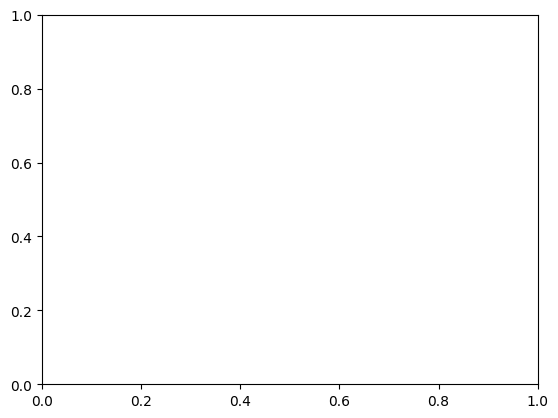

In [46]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

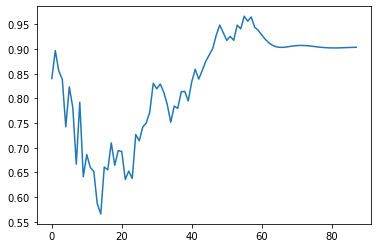

In [446]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [395]:
df3=scaler.inverse_transform(df3).tolist()

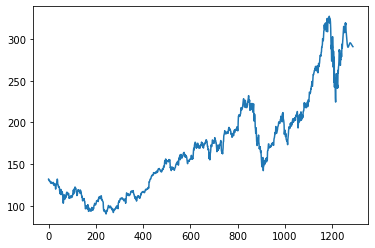

In [396]:
plt.plot(df3)